In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# 1.0 ANALYTICAL SOLUTION TO THE DUHAMEL INTEGRAL

In [2]:
import sympy as sym
sym.init_printing()

m = sym.Symbol('m')
w = sym.Symbol('w')
P0 = sym.Symbol('P0')
t1 = sym.Symbol('t1')
tau = sym.Symbol('tau')
t = sym.Symbol('t')

f = tau * sym.sin(w*t - w*tau)

def_int = sym.integrate(f, (tau,0,t))

print('This is the definite integral for the function')
sym.simplify(def_int)

This is the definite integral for the function


⎧t⋅w - sin(t⋅w)                                                               
⎪──────────────  for (w > -∞ ∨ w > 0) ∧ (w > -∞ ∨ w < ∞) ∧ (w > 0 ∨ w < 0) ∧ (
⎪       2                                                                     
⎨      w                                                                      
⎪                                                                             
⎪      0                                          otherwise                   
⎩                                                                             

              
w < 0 ∨ w < ∞)
              
              
              
              
              

In [3]:
P0 = 1000
t1 = 10
dt = 0.001
t = np.arange(0, t1+dt, dt)

array([0.000e+00, 1.000e-03, 2.000e-03, ..., 9.998e+00, 9.999e+00,
       1.000e+01])

In [4]:
m = 20
periodRange = [0.3, 0.4, 0.5]

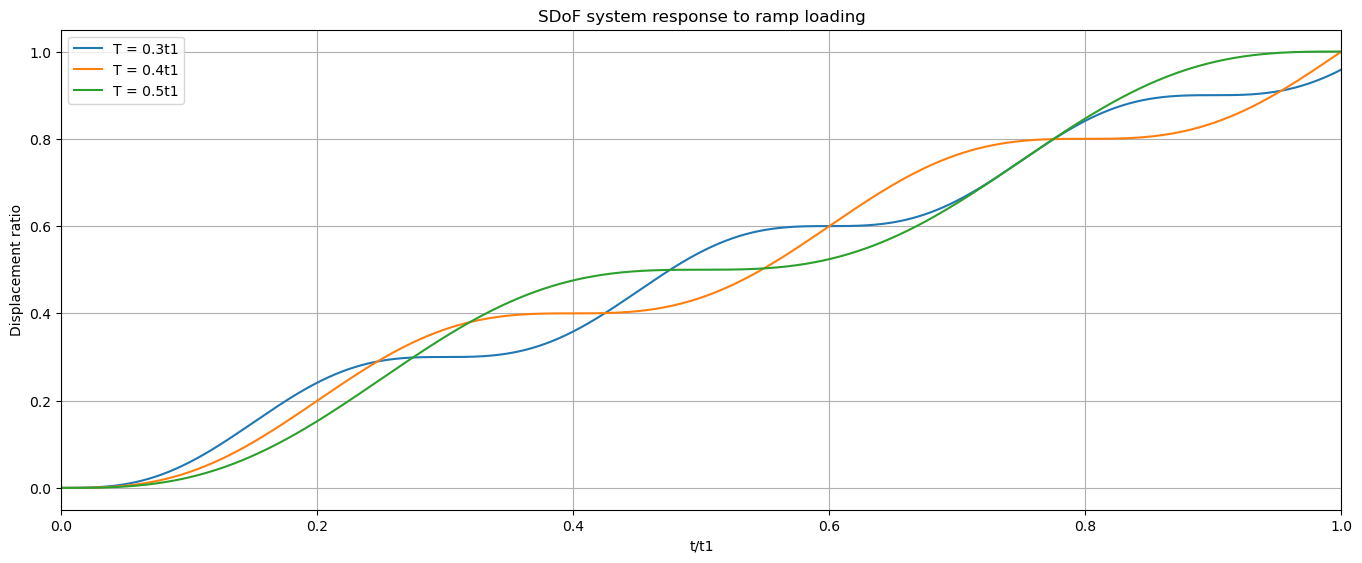

In [5]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,2,1])

for period in periodRange:
    T = period * t1
    wn = 2*math.pi / T
    k = m*wn**2
    u = (P0/k)*((t/t1) - ((np.sin(wn*t))/(wn*t1)))
    axes.plot(t/t1, u/(P0/k), label=f'T = {period}t1')
    
    
axes.set_xlabel('t/t1')
axes.set_ylabel('Displacement ratio')
axes.set_title('SDoF system response to ramp loading')
axes.legend(loc='upper left')
axes.set_xlim([0,1])
plt.grid()
plt.show()